In [ ]:
# EDA: CSIRO Biomass Dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# スタイル設定
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# データ読み込み
df = pd.read_csv("../data/input/csiro-biomass/train_wide.csv")
print(f"データ形状: {df.shape}")
df.head()


データ形状: (357, 12)


,image_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g
0,ID1011485656,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,0.0000,31.9984,16.2751,48.2735,16.2750
1,ID1012260530,train/ID1012260530.jpg,2015/4/1,NSW,Lucerne,0.55,16.0000,0.0000,0.0000,7.6000,7.6000,7.6000
2,ID1025234388,train/ID1025234388.jpg,2015/9/1,WA,SubcloverDalkeith,0.38,1.0000,6.0500,0.0000,0.0000,6.0500,6.0500
3,ID1028611175,train/ID1028611175.jpg,2015/5/18,Tas,Ryegrass,0.66,5.0000,0.0000,30.9703,24.2376,55.2079,24.2376
4,ID1035947949,train/ID1035947949.jpg,2015/9/11,Tas,Ryegrass,0.54,3.5000,0.4343,23.2239,10.5261,34.1844,10.9605


In [2]:
# データ概要
print("=== データ情報 ===")
df.info()
print("\n=== 基本統計量 ===")
df.describe()


=== データ情報 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_id       357 non-null    object 
 1   image_path     357 non-null    object 
 2   Sampling_Date  357 non-null    object 
 3   State          357 non-null    object 
 4   Species        357 non-null    object 
 5   Pre_GSHH_NDVI  357 non-null    float64
 6   Height_Ave_cm  357 non-null    float64
 7   Dry_Clover_g   357 non-null    float64
 8   Dry_Dead_g     357 non-null    float64
 9   Dry_Green_g    357 non-null    float64
 10  Dry_Total_g    357 non-null    float64
 11  GDM_g          357 non-null    float64
dtypes: float64(7), object(5)
memory usage: 33.6+ KB

=== 基本統計量 ===


,Pre_GSHH_NDVI,Height_Ave_cm,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.657423,7.595985,6.649692,12.044548,26.624722,45.318097,33.274414
std,0.152142,10.285262,12.117761,12.402007,25.401232,27.984015,24.935822
min,0.160000,1.000000,0.000000,0.000000,0.000000,1.040000,1.040000
25%,0.560000,3.000000,0.000000,3.200000,8.800000,25.271500,16.026100
50%,0.690000,4.000000,1.423500,7.980900,20.800000,40.300000,27.108200
75%,0.770000,7.000000,7.242900,17.637800,35.083400,57.880000,43.675700
max,0.910000,70.000000,71.786500,83.840700,157.983600,185.700000,157.983600


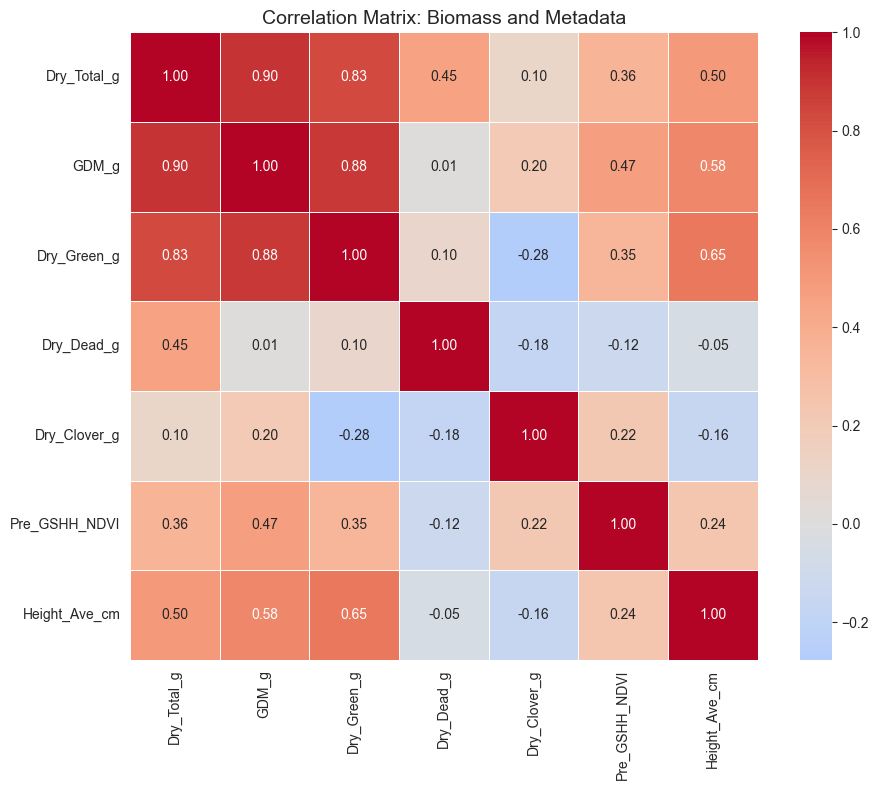

=== バイオマス量とメタデータの相関係数 ===
              Pre_GSHH_NDVI  Height_Ave_cm
Dry_Total_g        0.361291       0.497226
GDM_g              0.466534       0.582722
Dry_Green_g        0.351054       0.648439
Dry_Dead_g        -0.122818      -0.049721
Dry_Clover_g       0.224150      -0.160138


In [ ]:
# 相関関係の分析: バイオマス量とメタデータ

# 対象カラム
biomass_cols = ["Dry_Total_g", "GDM_g", "Dry_Green_g", "Dry_Dead_g", "Dry_Clover_g"]
metadata_cols = ["Pre_GSHH_NDVI", "Height_Ave_cm"]
target_cols = biomass_cols + metadata_cols

# 相関行列の計算
corr_matrix = df[target_cols].corr()

# ヒートマップで可視化
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix: Biomass and Metadata", fontsize=14)
plt.tight_layout()
plt.show()

# 相関係数の表示
print("=== バイオマス量とメタデータの相関係数 ===")
print(corr_matrix.loc[biomass_cols, metadata_cols])


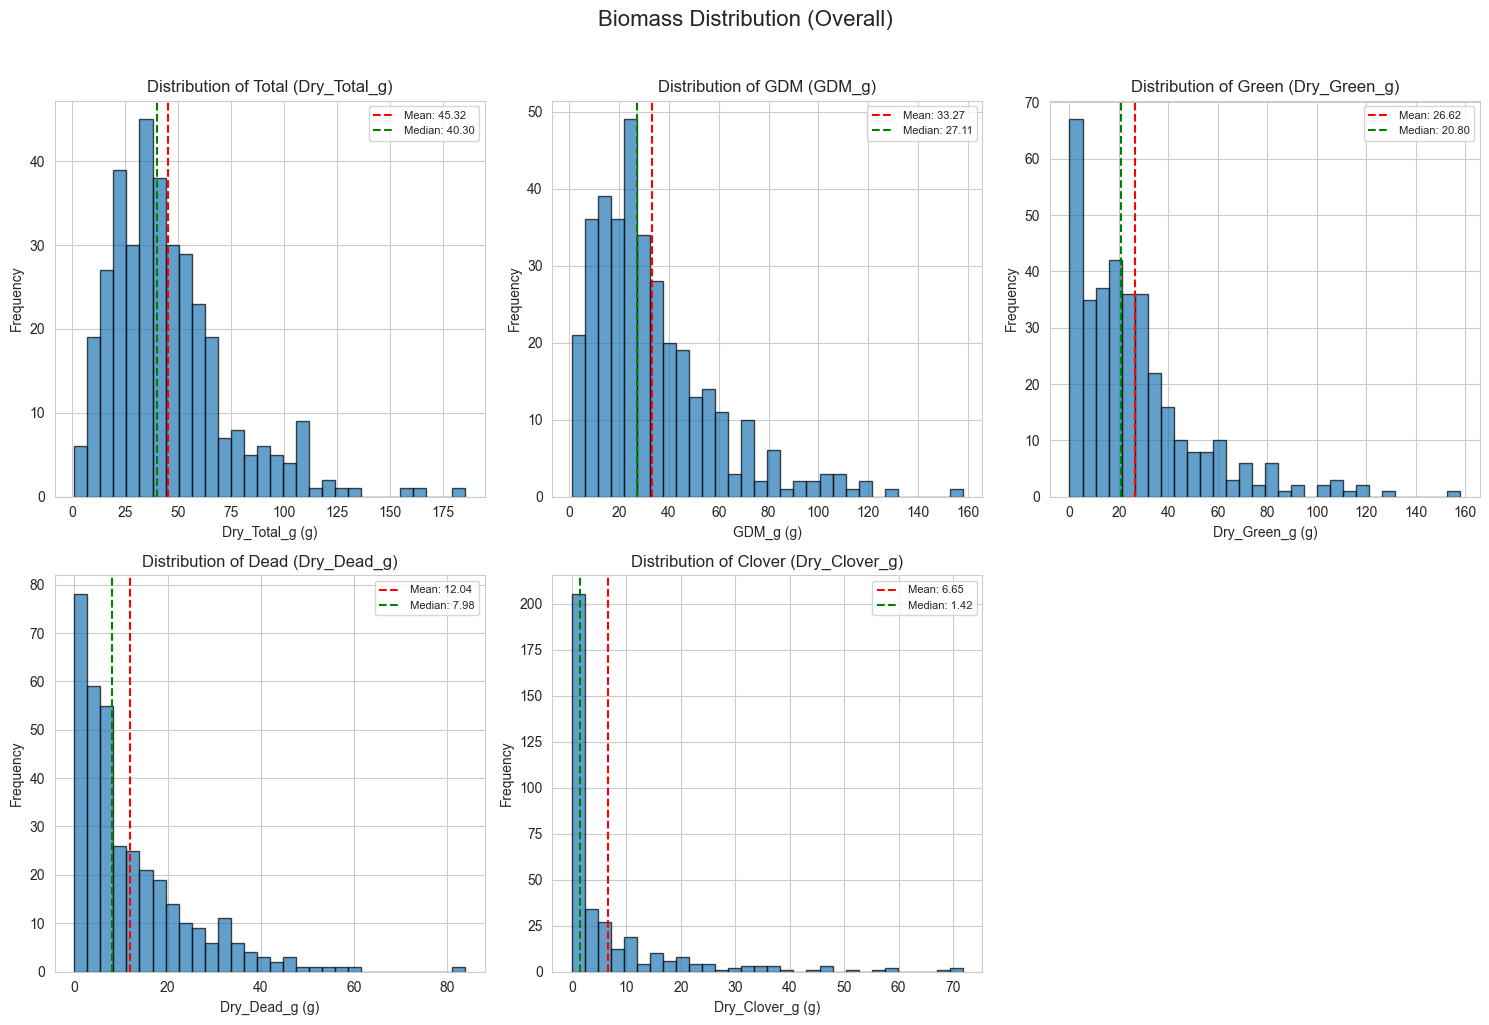

In [ ]:
# データ全体でのバイオマス量の分布

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

biomass_labels = [
    "Total (Dry_Total_g)",
    "GDM (GDM_g)",
    "Green (Dry_Green_g)",
    "Dead (Dry_Dead_g)",
    "Clover (Dry_Clover_g)",
]

for i, (col, label) in enumerate(zip(biomass_cols, biomass_labels)):
    ax = axes[i]
    ax.hist(df[col], bins=30, edgecolor="black", alpha=0.7)
    ax.set_xlabel(f"{col} (g)", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"Distribution of {label}", fontsize=12)
    ax.axvline(df[col].mean(), color="red", linestyle="--", label=f"Mean: {df[col].mean():.2f}")
    ax.axvline(df[col].median(), color="green", linestyle="--", label=f"Median: {df[col].median():.2f}")
    ax.legend(fontsize=8)

# 最後の空のサブプロットを非表示
axes[-1].axis("off")

plt.suptitle("Biomass Distribution (Overall)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


/var/folders/_c/4tq1x_g55znfb5c4kdd9szmw0000gn/T/ipykernel_49299/1109614590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='State', y=col, ax=ax, palette='Set2')
/var/folders/_c/4tq1x_g55znfb5c4kdd9szmw0000gn/T/ipykernel_49299/1109614590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='State', y=col, ax=ax, palette='Set2')
/var/folders/_c/4tq1x_g55znfb5c4kdd9szmw0000gn/T/ipykernel_49299/1109614590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='State', y=col, ax=ax, palette='Set2')
/var/folders/

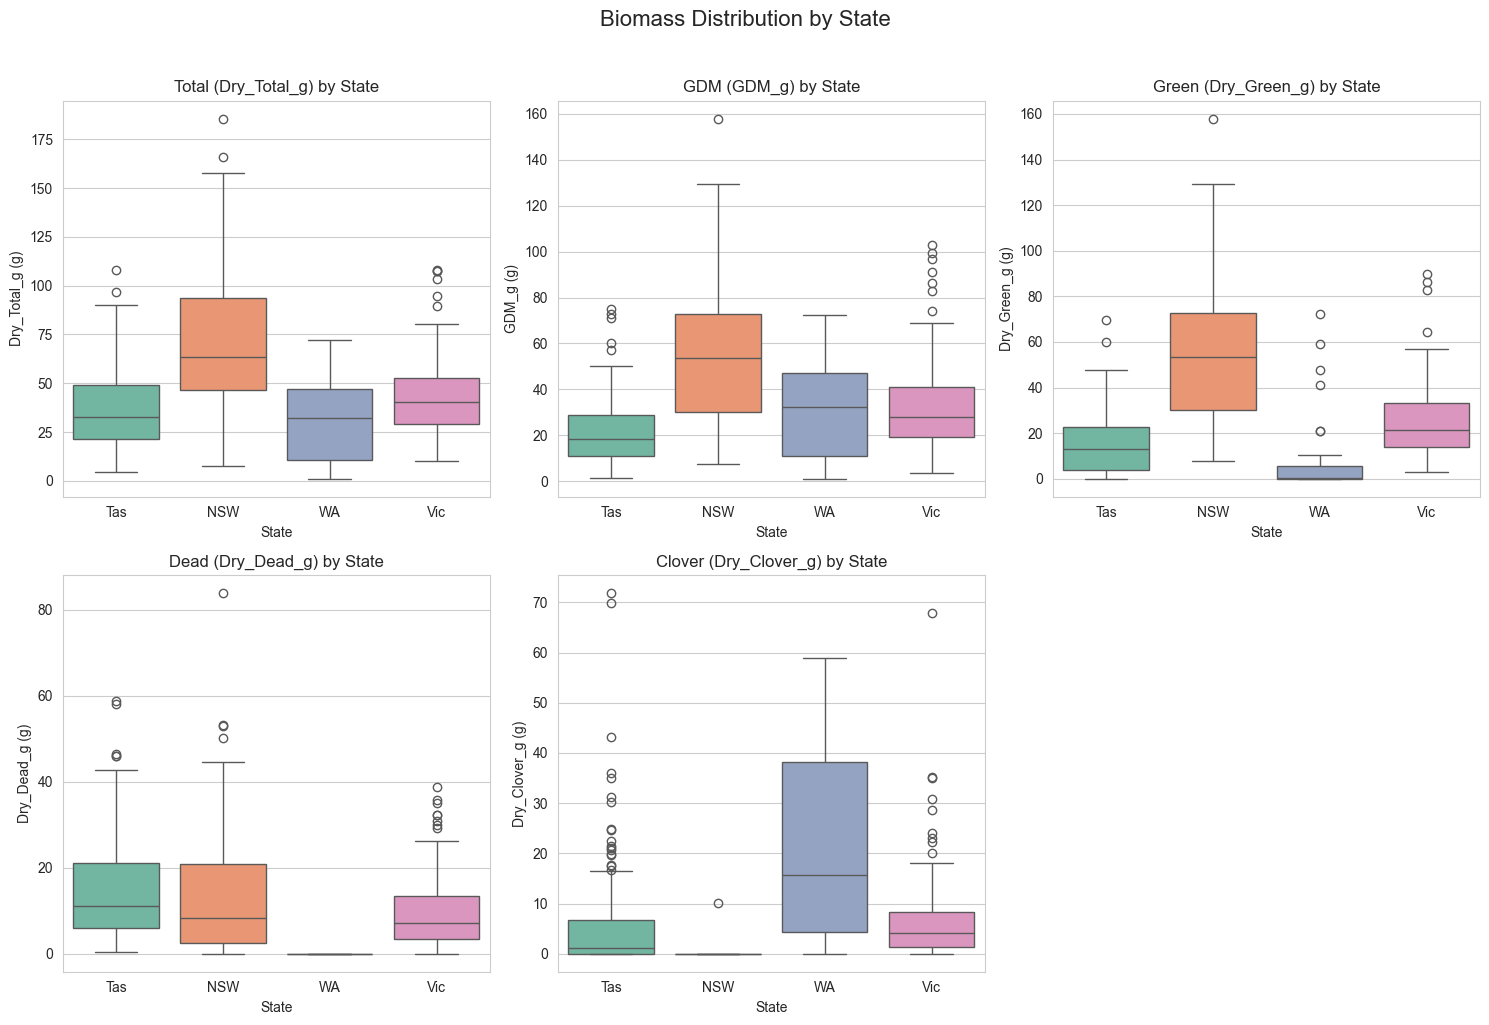

=== 州ごとのサンプル数 ===
State
Tas    138
Vic    112
NSW     75
WA      32
Name: count, dtype: int64


In [ ]:
# 州ごとのバイオマス量の分布

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col, label) in enumerate(zip(biomass_cols, biomass_labels)):
    ax = axes[i]
    sns.boxplot(data=df, x="State", y=col, ax=ax, palette="Set2")
    ax.set_xlabel("State", fontsize=10)
    ax.set_ylabel(f"{col} (g)", fontsize=10)
    ax.set_title(f"{label} by State", fontsize=12)

# 最後の空のサブプロットを非表示
axes[-1].axis("off")

plt.suptitle("Biomass Distribution by State", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 州ごとのサンプル数
print("=== 州ごとのサンプル数 ===")
print(df["State"].value_counts())
